In [56]:
#library
#manage data
import pandas as pd
import numpy as np

#extract kata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#latih/train data
from sklearn.model_selection import train_test_split
#training dan uji data dengan Naive Bayes
from sklearn.naive_bayes import MultinomialNB

#evaluasi
from sklearn import metrics
from sklearn.metrics import classification_report

#visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#prepare data set
tingkat_data = pd.read_csv('./dataset-uubs.csv')
columns = ['loma','hormat ka sorangan','hormat ka batur','kecap']
rows = []
train_data = pd.DataFrame(tingkat_data, columns=columns)

#tingkatan loma
tingkat_loma = [row['loma'] for index,row in train_data.iterrows()]
# print(tingkat_loma)
#tingkatan ls
tingkat_ls = [row['hormat ka sorangan'] for index,row in train_data.iterrows()]

#tingkatan lb
tingkat_lb = [row['hormat ka batur'] for index,row in train_data.iterrows()]

In [3]:
train_data

,loma,hormat ka sorangan,hormat ka batur,kecap
0,akang,akang,engkang,Gaganti ngaran
1,kuring,abdi,NaN,Gaganti ngaran
2,kuring sarerea,abdi sadayana,NaN,Gaganti ngaran
3,pribadi,pribados,ku anjeun,Gaganti ngaran
4,sorangan,sorangan,nyalira,Gaganti ngaran
5,adi,pun adi,tuang rai,Pancakaki
6,aki,pun aki,tuang eyang,Pancakaki
7,alo,pun alo,kapiputra,Pancakaki
8,anak,pun anak,tuang putra,Pancakaki
9,bapa,pun bapa,tuang rama,Pancakaki


In [4]:
#prepare data latih dan uji
lm = pd.DataFrame({'text' : tingkat_loma, 'tingkat': 'loma'})
ls = pd.DataFrame({'text' : tingkat_ls, 'tingkat': 'lemes ka diri'})
lb = pd.DataFrame({'text' : tingkat_lb, 'tingkat': 'lemes ka batur'})
data_uubs = pd.merge(lm,ls,how='outer')
data_uubs2 = pd.merge(data_uubs,lb,how='outer')
# data_uubs
data_set_nv = data_uubs2.copy()
data_set_nv

,text,tingkat
0,akang,loma
1,kuring,loma
2,kuring sarerea,loma
3,pribadi,loma
4,sorangan,loma
...,...,...
136,sinjang,lemes ka batur
137,pameres,lemes ka batur
138,kurabu,lemes ka batur
139,tudung,lemes ka batur


In [5]:
#ubah label data menjadi numerik
data_set_nv['label_num'] = data_set_nv.tingkat.map({'loma':0, 'lemes ka diri':1, 'lemes ka batur':2})
data_set_nv['label_num'].value_counts()
data_set_nv

,text,tingkat,label_num
0,akang,loma,0
1,kuring,loma,0
2,kuring sarerea,loma,0
3,pribadi,loma,0
4,sorangan,loma,0
...,...,...,...
136,sinjang,lemes ka batur,2
137,pameres,lemes ka batur,2
138,kurabu,lemes ka batur,2
139,tudung,lemes ka batur,2


In [6]:
#info data
#keterangan label
kategori_data = ['tingkat']
for kolom in kategori_data:
    print(kolom, data_set_nv[kolom].unique())
    
#jumlah baris dan kolom
print('jumlah baris dan kolom : ',data_set_nv.shape)

#jumlah isi class
print('jumlas isi class/label :\n',data_set_nv.tingkat.value_counts())

tingkat ['loma' 'lemes ka diri' 'lemes ka batur']
jumlah baris dan kolom :  (141, 3)
jumlas isi class/label :
 loma              47
lemes ka diri     47
lemes ka batur    47
Name: tingkat, dtype: int64


In [7]:
#info data set
data_set_nv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       139 non-null    object
 1   tingkat    141 non-null    object
 2   label_num  141 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.4+ KB


In [8]:
#cek data null
data_set_nv.isnull().sum()

text         2
tingkat      0
label_num    0
dtype: int64

In [9]:
#data set awal
data_set_nv.shape

(141, 3)

In [10]:
#drop data null
data_set = data_set_nv.dropna()

In [11]:
#cek data null kembali
data_set.isnull().sum()
# print(data_clear)

text         0
tingkat      0
label_num    0
dtype: int64

In [12]:
#data set clear
data_set.shape

(139, 3)

In [13]:
data_set

,text,tingkat,label_num
0,akang,loma,0
1,kuring,loma,0
2,kuring sarerea,loma,0
3,pribadi,loma,0
4,sorangan,loma,0
...,...,...,...
136,sinjang,lemes ka batur,2
137,pameres,lemes ka batur,2
138,kurabu,lemes ka batur,2
139,tudung,lemes ka batur,2


In [55]:
#prepare latih/training data
#probabilitas/tfidf
transformer = TfidfTransformer(smooth_idf=False)
vect = CountVectorizer(ngram_range=(1,2))

#extract data
train_counts = vect.fit_transform(data_set['text'].values)
train_tfidf = transformer.fit_transform(train_counts)
label = data_set['label_num'].values
tdm_t2 = pd.DataFrame(train_tfidf.toarray(), columns=vect.get_feature_names_out())
# print(train_tfidf)
# tdm_t2

In [15]:
#prepare data latih/training data
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, label,random_state=30)

In [16]:
#process latih/training dengan data Naive Bayes
nb = MultinomialNB()
model = nb.fit(X_train,y_train)
print(model)
nb.score(X_train,y_train)

MultinomialNB()


0.875

In [17]:
#process uji/testing dengan data Naive Bayes
model2 = nb.fit(X_test,y_test)
print(model2)
nb.score(X_test, y_test)

MultinomialNB()


0.9714285714285714

In [18]:
#predict data
docs_new = ['keris']
X_new_counts = vect.transform(docs_new)
X_new_tfidf = transformer.transform(X_new_counts)

predicted = nb.predict(X_new_tfidf)
print(predicted)

[1]


In [19]:
#evaluasi training and tasting
y_pred_class = nb.predict(X_test)
# y_pred_class
metrics.confusion_matrix(y_test, y_pred_class)

array([[11,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 10]], dtype=int64)

<AxesSubplot:>

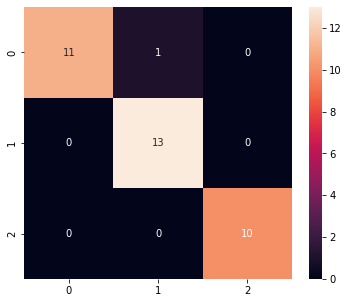

In [58]:
plt.figure(figsize = (6, 5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_class), annot=True)

In [20]:
print(classification_report(y_test, y_pred_class, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        10

    accuracy                           0.97        35
   macro avg       0.98      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



In [77]:
from sklearn.model_selection import KFold, cross_val_score
# k_fold = KFold(len(y_test), n_folds=10, shuffle=True, random_state=0)
k_fold = KFold(len(y_test),shuffle=True, random_state=0)
clf = MultinomialNB()
print(cross_val_score(clf, X_test, y_test, cv=k_fold, n_jobs=1))

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]


In [21]:
#prepocessing
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer 

In [48]:
#data cleaning

#filter karakter
#filter ubah huruf kecil
def remove_char(text):
    if len(text):
        tokenizer = RegexpTokenizer(r"[a-zA-Z]+")
        lst=tokenizer.tokenize(' '.join(text))
        lstxt = list((map(lambda x: x.lower(), lst)))
        return lstxt
    else:
        return print('empty')

In [34]:
#filter kata yang termasuk dalam kamus
def check_dict(text):
    result = []
    for token in text:
        if token in list(data_set['text']):
            result.append(token)  
    return result

In [53]:
new_sentence = 'Pun Adi sareng pun bapa mah atos tuang 2 ?'
new_word_list = word_tokenize(new_sentence)
# k_piih = 'loma'
print(new_word_list)
clean_data = remove_char(new_word_list)
print(clean_data)


#data reduction
#tokenize
#filter semantik

#data tranformation and data discretization
#extract text to process value tfidf
#train data

#data integration

['Pun', 'Adi', 'sareng', 'pun', 'bapa', 'mah', 'atos', 'tuang', '2', '?']
['pun', 'adi', 'sareng', 'pun', 'bapa', 'mah', 'atos', 'tuang']


In [54]:
#semantik 2 kata
tx = list(nltk.bigrams(clean_data))
kt = []
for lst in tx:
    txf = ' '.join(lst)
    kt.append(txf)
# print(kt)
kt_nw = kt
dt_sm = check_dict(kt)
dt_sm_new = list(map(word_tokenize,dt_sm))

# print('awal: ',kt)
# print('pilih sesuai corpus: ',dt_sm)
# print('breakdown: ',dt_sm_new)
print('data clean: ',clean_data)

a = np.array(dt_sm_new)
b = np.array(clean_data+dt_sm)
# print('a: ',a)
print('b: ',b)
c = a.ravel()
# print('c: ',c)
con = np.concatenate((c,b),axis=0)
# print(set(con))
# print(con)
new = np.setdiff1d(con, c)

print('hasil akhir: ',new)
new_dt = check_dict(new)
print('hasil final: ',new_dt)
# type(c)

data clean:  ['pun', 'adi', 'sareng', 'pun', 'bapa', 'mah', 'atos', 'tuang']
b:  ['pun' 'adi' 'sareng' 'pun' 'bapa' 'mah' 'atos' 'tuang' 'pun adi'
 'pun bapa']
hasil akhir:  ['atos' 'mah' 'pun adi' 'pun bapa' 'sareng' 'tuang']
hasil final:  ['pun adi', 'pun bapa']


In [32]:
#predict data
#beri tanda yg tidak sesuai kategori
#hasil freq ditampilkan ke persen